## Import Library

In [3]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


## Prepare Date

In [2]:
file_name = "data/telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"

file_path = os.path.abspath(file_name)

print(f" Đường dẫn file:\n{file_path}\n")

df = pd.read_csv(file_path, on_bad_lines="skip")

display(df.head(10))

 Đường dẫn file:
C:\Users\ASUS\projects\CUSTOMER-ANALYST\data\telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Choosing Features

In [5]:
features = ["tenure", "MonthlyCharges", "TotalCharges", 
            "Contract", "InternetService", "PaymentMethod"]

X = df[features].copy()

X.head(10)

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod
0,1,29.85,29.85,Month-to-month,DSL,Electronic check
1,34,56.95,1889.5,One year,DSL,Mailed check
2,2,53.85,108.15,Month-to-month,DSL,Mailed check
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic)
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check
5,8,99.65,820.5,Month-to-month,Fiber optic,Electronic check
6,22,89.10,1949.4,Month-to-month,Fiber optic,Credit card (automatic)
7,10,29.75,301.9,Month-to-month,DSL,Mailed check
8,28,104.80,3046.05,Month-to-month,Fiber optic,Electronic check
9,62,56.15,3487.95,One year,DSL,Bank transfer (automatic)


# Data Preprocessing

In [6]:
X["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   MonthlyCharges   7043 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   Contract         7043 non-null   object 
 4   InternetService  7043 non-null   object 
 5   PaymentMethod    7043 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 330.3+ KB


# StandardScaler + OnehotEncoder

In [8]:
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = ["Contract", "InternetService", "PaymentMethod"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [9]:
X_processed.shape


(7043, 13)

In [10]:
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

print(np.isnan(X_processed).sum())   # tổng số NaN
print(np.isnan(X_processed).any())   # có NaN hay không


0
False


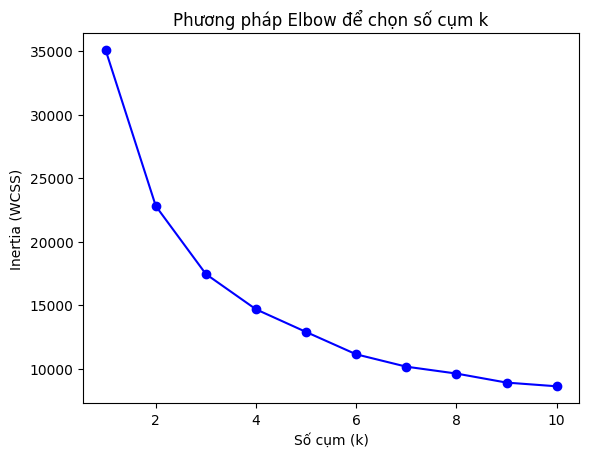

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Chạy KMeans với nhiều số cụm khác nhau
inertia = []
K = range(1, 11)  # thử từ 1 đến 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(K, inertia, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Phương pháp Elbow để chọn số cụm k')
plt.show()


In [12]:


kmeans = KMeans(n_clusters=3, random_state=42).fit(X_processed)
labels = kmeans.labels_

score = silhouette_score(X_processed, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.2908902121041029


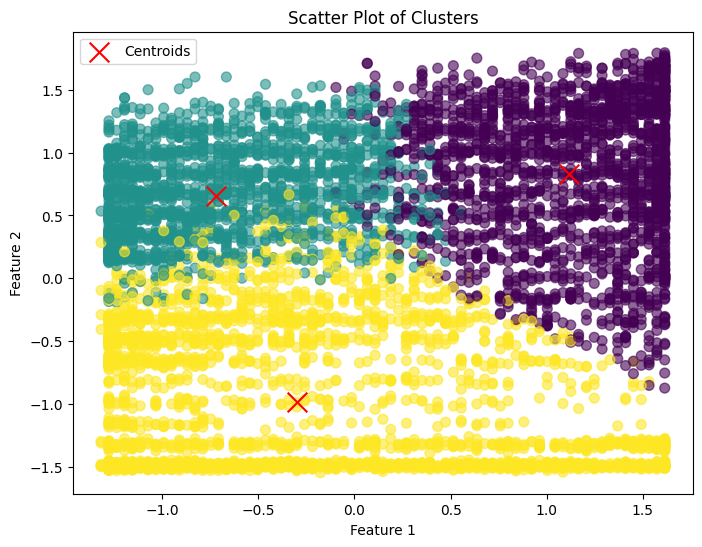

In [13]:
# Giả sử X là dữ liệu 2D
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_processed)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))

# Vẽ các điểm, màu theo cụm
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Vẽ tâm cụm
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title("Scatter Plot of Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [14]:


n_features = X_processed.shape[1]  # 13
selected_columns = ["SeniorCitizen", "tenure", "PhoneService", "MultipleLines",
                    "InternetService", "OnlineSecurity", "OnlineBackup",
                    "DeviceProtection", "TechSupport", "StreamingTV",
                    "StreamingMovies", "MonthlyCharges", "TotalCharges"]

tf = pd.DataFrame(X_processed, columns=selected_columns)
tf['Cluster'] = labels


In [15]:
print(df.columns)
print(tf.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'TotalCharges', 'Cluster'],
      dtype='object')


# Linear Regression

In [17]:
    

    target = "MonthlyCharges"
    exclude_cols = [target, 'Cluster', 'customerID', 'Churn']
    features = [col for col in df.columns if col not in exclude_cols]
    
    print("Target:", target)
    print("Features:", features)
    
    X = df[features]   
    y = df[target]    
    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    
    numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
    
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    
    
    model.fit(X_train, y_train)
    
    
    
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"Train MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
    print(f"Test MSE: {mse_test:.2f}, R2: {r2_test:.2f}")
    
 
    if r2_train - r2_test > 0.1:
        print("OVERFITTING")

Target: MonthlyCharges
Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Train MSE: 0.02, R2: 1.00
Test MSE: 1.32, R2: 1.00


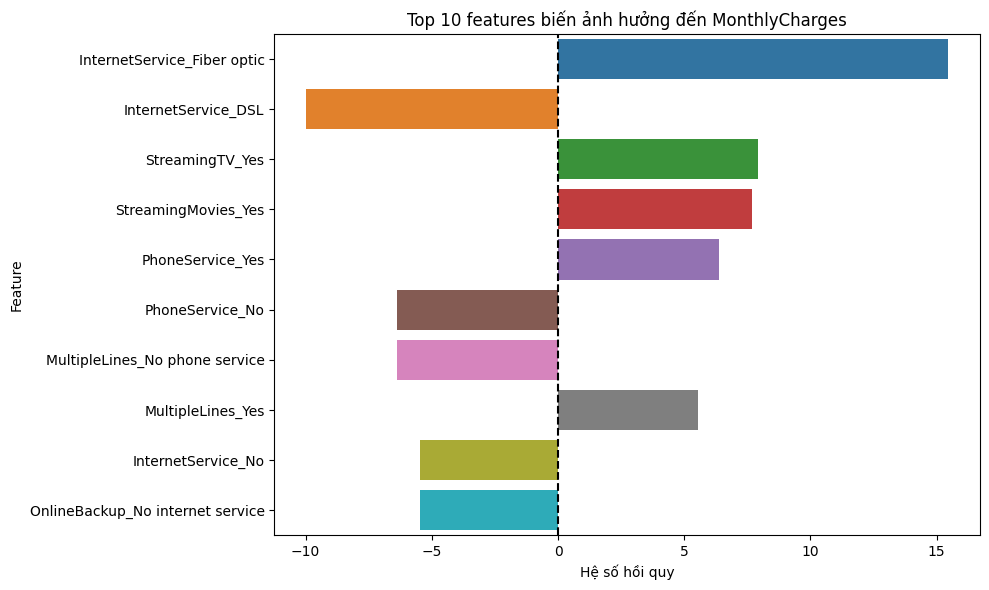

In [19]:

regressor = model.named_steps['regressor']


preprocessor = model.named_steps['preprocessor']


num_features = numeric_features


cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)


all_features = np.concatenate([num_features, cat_features])


coefs = regressor.coef_


coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefs})


coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()

coef_df.sort_values(by='AbsCoefficient', ascending=False, inplace=True)

coef_df[['Feature','Coefficient']]

import matplotlib.pyplot as plt
import seaborn as sns


top_features = coef_df.head(10)

plt.figure(figsize=(10,6))

sns.barplot(
    x='Coefficient',
    y='Feature',
    data=top_features,
    hue='Feature',   
    dodge=False,     
    legend=False     
)

plt.title('Top 10 features biến ảnh hưởng đến MonthlyCharges')
plt.xlabel('Hệ số hồi quy')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')  # đường 0
plt.tight_layout()
plt.show()


# Classfication

Accuracy: 0.8239886444286728


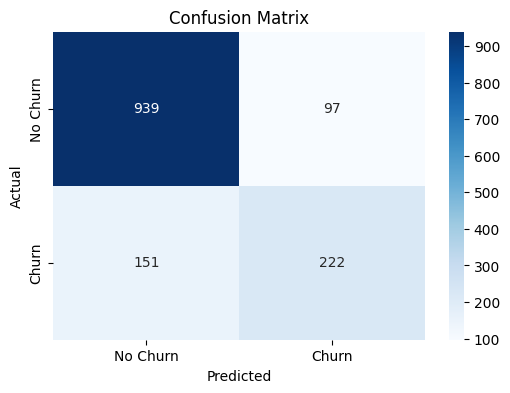

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


target = "Churn"
exclude_cols = [target, 'Cluster', 'customerID']
features = [col for col in df.columns if col not in exclude_cols]

X = df[features]
y = df[target].apply(lambda x: 1 if x == "Yes" else 0)  # Churn = 1 nếu khách rời bỏ


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
